# Spectrum 
[audio-deep-learning-made-simple-part-2]([audio-deep-learning-made-simple-part-2](https://towardsdatascience.com/audio-deep-learning-made-simple-part-2-why-mel-spectrograms-perform-better-aad889a93505))

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pylab as plt
from pydub import AudioSegment, silence

from pydub.playback import play

%matplotlib inline

In [3]:
import src.utils

In [11]:
df = src.utils.generate_new_df()
df.tail()

,key,name,sci_name,id,data-xc-filepath,data-xc-id,page,row,length,contributor,...,time,country,location,elev,type,note,bird_seen,playback_used,class,size
245,33835,Yellow-olive Flatbill,Tolmomyias-sulphurescens,xc_audio_96443_257,//xeno-canto.org/sounds/uploaded/DGVLLRYDXS/TO...,96443,2114,1,0:32,Jeremy Minns,...,10:46,Brazil,Serra dos Carajás. Rio Parauapebas,170,"Call, song",Várzea / transitional forest. Natural calls of...,yes,no,A,520797
246,33836,Yellow-olive Flatbill,Tolmomyias-sulphurescens,xc_audio_96441_258,//xeno-canto.org/sounds/uploaded/DGVLLRYDXS/TO...,96441,2114,2,0:45,Jeremy Minns,...,07:38,Brazil,"Anavilhanas Archipelago, Amazonas",16,Song,Edge of flooded igapó forest. After playback.,NaN,NaN,A,729856
247,33903,Rufous-bellied Thrush,Turdus-rufiventris,xc_audio_91630_1007,//xeno-canto.org/sounds/uploaded/UTCLOBFQPH/LS...,91630,2116,9,1:36,Juha Honkala,...,14.00,Brazil,Intervales State Park. Residential area,800,song,[sono],NaN,NaN,A,1551503
248,33951,Rufous-bellied Thrush,Turdus-rufiventris,xc_audio_91094_960,//xeno-canto.org/sounds/uploaded/JDNMEJOJEQ/Tu...,91094,2117,27,0:37,Glauco Kohler,...,16:35,Brazil,"RPPN Chácara Edith, Brusque, Santa Catarina",30,song,Recording (not its ID) has been discussed. See...,NaN,NaN,A,610238
249,34000,Yellow-olive Flatbill,Tolmomyias-sulphurescens,xc_audio_90201_808,//xeno-canto.org/sounds/uploaded/INDDBZAFJL/R0...,90201,2119,16,0:18,Alexander Lees,...,09:00,Brazil,"Bonfinopolis, GO",850,song,secondary forest at edge of cattle pasture,NaN,NaN,A,303557


In [5]:
df.shape

(250, 21)

In [9]:
src.utils.get_sel_mp3_fname(167)

'./data/sound_selected_db/sound_167.mp3'

In [83]:
song = AudioSegment.from_mp3(src.utils.get_mp3_fname(3))
# play(song)

In [ ]:
for ri , row in df.iterrows():
    song = AudioSegment.from_mp3(src.utils.get_sel_mp3_fname(row['key']))
    if song.channels == 2:
        song = song.set_channels(1)
    elif song.channels > 2:
        print(f'in row {ri} more than two channels {song.channels}')
    else:
        pass

    commponents = silence.split_on_silence(song)
    if commponents:
        result = commponents[0]
        for i in range(1, len(commponents)):
            result.append(commponents[i], crossfade=0)

    seg = np.fft.fft(np.array(song.get_array_of_samples()))
    fig, ax = plt.subplots(1, figsize=(12,12))
    ax.specgram(seg, NFFT=1024, Fs=song.frame_rate, noverlap=900)
    # ax.set_xlabel('Time')
    # ax.set_ylabel('Frequency')
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)

    plt.savefig(f"./data/pics_selected_db/spectrum_{row['key']}.png", dpi=150)



In [77]:
np.array(song.get_array_of_samples()).shape

(1194624,)

In [63]:
seg = np.fft.fft(np.array(song.get_array_of_samples()))
seg.shape, seg

((1194624,),
 array([-793879.            +0.j        ,  249634.00870782 -1078.15987194j,
         174286.23705362+23692.38332479j, ...,
         245472.95654881 +3606.20937884j,  174286.23705362-23692.38332479j,
         249634.00870782 +1078.15987194j]))

In [64]:
seg[np.abs(seg)<10.1]

array([-9.14170554-0.6753355j , -4.51955708+7.11193507j,
       -4.98529474+0.41187588j,  0.85409671+9.91642658j,
        8.97879942-3.0832914j ,  5.7641218 +2.19403504j,
        6.31174672-3.87351913j,  6.52887887+7.2731691j ,
       -2.93158379-1.08640338j,  9.01602657+1.97225904j,
        7.2105585 +4.81741734j, -2.67918287-1.14839594j,
       -3.95202472-6.13943299j, -5.03698136+7.53825658j,
       -2.8303456 +7.83667241j, -0.9126182 -2.14468993j,
        2.35002547-7.70997826j, -3.09783401-7.3144298j ,
       -4.4058888 -2.30930173j, -1.9024249 +4.07144356j,
        3.83844124+3.46076852j, -0.34854837-8.66469507j,
        2.27624278+3.65154199j,  3.96433499+6.18625282j,
        2.66863574-5.37379268j,  3.40603103+2.53922485j,
        7.88079816+2.93747246j, -8.76170098+3.9134814j ,
       -2.34709319-9.21594027j, -4.02221132+4.35556158j,
       -7.46038919-6.73135802j,  3.32083081-3.25757924j,
       -0.10108192+4.48944227j, -2.89764463-0.94769494j,
       -0.83870407-5.30520482j,

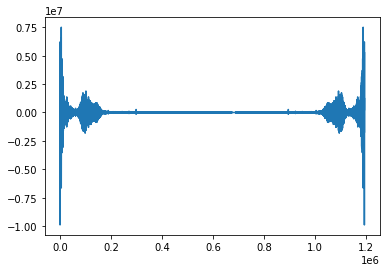

In [65]:
plt.plot(np.real(seg))

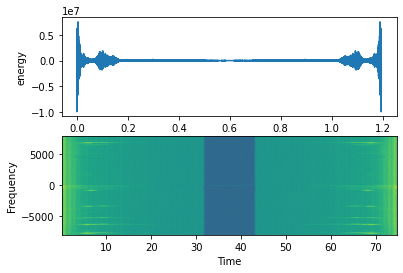

In [66]:
sample_rate = 16000
plt.figure(1)

plot_a = plt.subplot(211)
plot_a.plot(seg)
plot_a.set_xlabel('sample rate * time')
plot_a.set_ylabel('energy')

plot_b = plt.subplot(212)
plot_b.specgram(seg, NFFT=1024, Fs=sample_rate, noverlap=900)
plot_b.set_xlabel('Time')
plot_b.set_ylabel('Frequency')

plt.savefig('./data/sound_3.png')
plt.show()